# Regularization:
*(is a hyperparameter, another thing you can add to your toolkit)*
*but if you choose wrong features, it won't save you*

**GOAL**: 
* reduce overfitting
* reduce the strengths of coeffients
* artificically add bias into the training process

### What is regularization?
**Regularization** is a set of techniques that constrain the complexity of models. They thus reduce the risk of **overfitting** and improve the ability of a model to **generalize**.

| <p style="font-size: 17px">Method</p>      | <p style="font-size: 17px">Description</p> |
| ----------- | ----------- |
| <p style="font-size: 17px">Ridge Regression (L2)</p>      | <p style="font-size: 17px">penalizes the square of coefficents</p>       |
| <p style="font-size: 17px">Lasso (L1)</p>      | <p style="font-size: 17px">penalizes the absolute coefficients</p>       
| <p style="font-size: 17px">Elastic Net (L1 + L2)</p>      | <p style="font-size: 17px">weighted combination of Ridge and Lasso</p>
| <p style="font-size: 17px">`sklearn.linear_model.Ridge`</p>      | <p style="font-size: 17px">linear regressor using L2</p>      
| <p style="font-size: 17px">`sklearn.linear_model.Lasso`</p>      | <p style="font-size: 17px">linear regressor using L1</p>
| <p style="font-size: 17px">`sklearn.linear_model.ElasticNet`</p>      | <p style="font-size: 17px">linear regressor using L1 + L2</p>


### The Bias-Variance tradeoff

<img src="biance_variance.png" width="600" height="1000" />

**Bias** is the expected error created by a model to approximate real-world relationship.

**Variance** is the amount by which our model would change with a different training dataset. It is the "flexibility" of our model, balanced against the bias.


### Ridge Regression
**Ridge Regression** penalizes the **coefficents** of linear models. The penalty is proportional to the square of the parameter value. This leads to parameters with smaller absolute values.

$$MSE + \alpha \sum_j^p{\hat{w_j}^2}$$

The hyperparameter *alpha* controls how strong the regularization is (low alpha = little regularization, high alpha = very strong regularization).

The penalty is also called **L2-Norm (Euclidian Norm)**, because it can be written as:

$$\left||L2 |\right| = \sqrt{x_1^2 + x_2^2 + x_3^2 }$$

<span style="background-color: #FF0000">**For L1 or L2 to work, the data must be scaled!**</span>

<span style="background-color: #FFFF00">**Hint: Ridge Regression is the first type of regularization you should try.**</span>


### Lasso Regression
Lasso penalizes the absolute values of coefficients. It uses the L1 norm (Manhattan Norm). This pushes some coefficents down to zero.

$$\left||L1 |\right| = \alpha \sum_j^p{|w_j|}$$

The hyperparameter **alpha** is the regularization strength. The higher it is, the more coefficients will become zero.

Therfore, Lasso can be used for **Automatic Feature Selection**.


### Elastic Net
**Elastic Net*** combines Ridge and Lasso. The additional hyperparameter *rho* determines the proportion between both types.

$$MSE + \alpha \rho \left||w |\right|_1 + \frac{\alpha(1-\rho)}{2}\left||w |\right|_2^2$$


## Effect of regularization strength
Create the trained coefficents of a model of for the `cancer` dataset as bar plot.

In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

X, y = load_breast_cancer(True)

m = LogisticRegression()
m.fit(X, y)
print(m.score(X, y))

print(m.coef_[0])

0.9472759226713533
[ 0.94887778  0.45181226  0.2756124  -0.01489119 -0.03533223 -0.16636378
 -0.23293603 -0.09813477 -0.04896167 -0.00976001  0.04111834  0.37720966
  0.14447764 -0.10732826 -0.00319948 -0.03571714 -0.0497692  -0.01277925
 -0.01181894 -0.00331433  1.00803607 -0.4875605  -0.2582965  -0.01363453
 -0.06409891 -0.51869566 -0.64553561 -0.18883339 -0.1552393  -0.04984351]


/Users/lara/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


<BarContainer object of 30 artists>

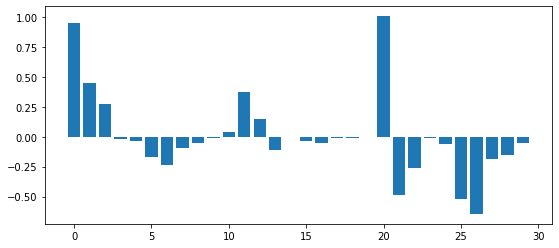

In [17]:
import numpy as np
import matplotlib.pyplot as plt
#data = np.array([-0.150896, 0.23357229, 0.00669907, 0.3730938, 0.100852, -0.85258357])
data = m.coef_[0]
#labels = ['as','df','as','df','as','df']

fig= plt.figure(figsize=(20,4))
ax=plt.subplot(122)
plt.bar(np.arange(data.size), data)
#ax.set_xticks(np.arange(data.size))
#ax.set_xticklabels(labels)

In [19]:
# create plots for a range of regularization strengths (using L2, L1 or ElasticNet)

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [23]:

m_ridge = Ridge(alpha=5.0)
m_lasso = Lasso(alpha=5.0)
m_elanet = ElasticNet(alpha=5.0)

m_ridge.fit(X, y)  
m_lasso.fit(X, y) 
m_elanet.fit(X, y)

ElasticNet(alpha=5.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

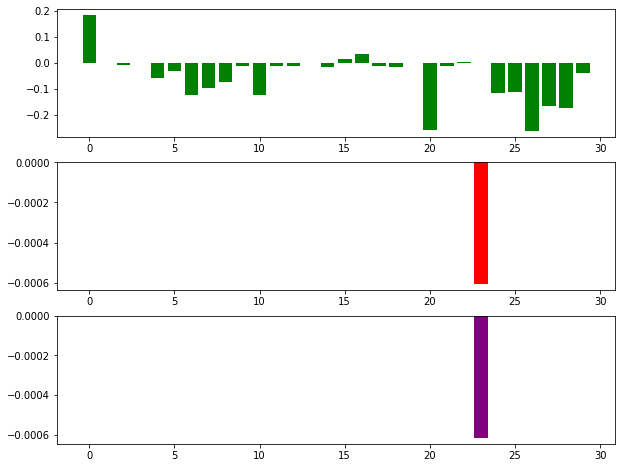

In [80]:
import matplotlib.pyplot as plt

fig= plt.figure(figsize=(10,8))
#f, ax = plt.subplots(3, 1, sharex='all', sharey='all', figsize=(8, 7))

plt.subplot(3,1,1)
ax = plt.bar(np.arange((m_ridge.coef_).size), m_ridge.coef_, color='green')
plt.subplot(3,1,2)
ax = plt.bar(np.arange((m_lasso.coef_).size), m_lasso.coef_, color='red')
plt.subplot(3,1,3)
ax = plt.bar(np.arange((m_elanet.coef_).size), m_elanet.coef_, color='purple')



### Boston Housing - implement Ridge, Lasso and Elastic Net

- split the data into training and test data
- scale the data
- try a few different models
- construct a sklearn.pipeline.Pipeline that does the scaling and the model
- run a grid search with cross validation to optimize hyperparameters

In [83]:
from sklearn import datasets

boston = datasets.load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [87]:
type(boston)

sklearn.utils.Bunch

### Task 1:

Let's try to create some data that roughly follows this equation:


$$ y = \sqrt x $$


Add in some random, normally-distributed noise in the data to make it a bit more interesting.

In [ ]:
import numpy as np

In [ ]:
X = np.arange(0, 60, 5)
y = [np.sqrt(x_val) + np.random.normal(0, 0.5) for x_val in X]

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(X, y, s=8)

---

### Task 2:

**Now let's intentionally overfit a model that focuses too much on training examples.**
- Use Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = X.reshape(12, 1)

poly = PolynomialFeatures(degree=12) 
m = LinearRegression() 

X_poly = poly.fit_transform(X) 

m.fit(X_poly, y)

ypred = m.predict(X_poly)

In [ ]:
plt.scatter(X, y, s=8)
plt.plot(X, ypred)

### Task 3:

**Let's look at another extreme case. Generate similar data but purposely throw in some outliers.**

In [ ]:
X = np.linspace(0, 15, 15).reshape(-1,1)
y = [np.sqrt(x_val) + np.random.normal(0,0.1) for x_val in X]

### Create some outliers intentionally
y[2] = 3
y[8] = 1

plt.scatter(X, y, s=8)

### Task 4:

**Observe the effect of regularization**

In [ ]:
### Make model unnecessarily complex
poly = PolynomialFeatures(degree=4) #transformative model
X_poly = poly.fit_transform(X)

### Reduce the complexity through regularization
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet # combination of Ridge and Lasso
m = LinearRegression() 
m_ridge = Ridge(alpha=5.0)
m_lasso = Lasso(alpha=5.0)

m.fit(X_poly, y)       
m_ridge.fit(X_poly, y)  
m_lasso.fit(X_poly, y)  

ypred = m.predict(X_poly)
ypred_ridge = m_ridge.predict(X_poly)
ypred_lasso = m_lasso.predict(X_poly)

plt.figure(figsize=(12, 8))
plt.scatter(X, y, s=8)
plt.plot(X, ypred)
plt.plot(X, ypred_ridge)
plt.plot(X, ypred_lasso)
plt.legend(['No regularization', 'Ridge Regularization', 'Lasso Regularization'])

In [ ]:
m.score(X_poly, y)

 <span style="color: red;">**always do a little bit of regularization!** </span> -> will improve the result of the model a little bit

**Inspect Coefficients**

In [ ]:
m.coef_

In [ ]:
m_ridge.coef_

tries to get the coefficients closer to zero

In [ ]:
m_lasso.coef_